In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import functions as fu
import rhos as rh
import test as test

## Separable State

In [2]:
# parameters

N = 3
D = 10  # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345

type = "separable"

In [3]:
# Initialization of the coefficients c_j for each subsystem

init_coeff = [
    np.array([1, 0]),  # Subsystem 1 (|0⟩)
    np.array([1/np.sqrt(2), 1/np.sqrt(2)]),  # Subsystem 2 (|0⟩ + |1⟩) / √2
    np.array([0, 1])   # Subsystem 3 (|1⟩)
]

# Case 1: i want to randomly initialize the coefficients
coefficients = fu.initialize_coefficients(N, D, seed, type, init_coeff, random_init=True)  # Use random initialization

# Case 2: i manually initialize the coefficients
# coefficients = fu.initialize_coefficients(N, D, seed, type, init_coeff, random_init=False)  # Use random initialization



In [4]:
# Calculate the separable state
separable_state = fu.create_state(N, D, coefficients, type)
print("Separable state:", separable_state)

Separable state: [ 9.41738976e-03+3.32892478e-02j  9.42581259e-03+1.61573726e-02j
  3.65600432e-03+3.94303571e-02j -1.91177053e-02+2.70003859e-02j
 -8.39438019e-03+2.13719237e-02j  3.39377345e-03+1.00486086e-02j
  1.05139097e-03+2.39935627e-02j  3.44081998e-03+2.07944880e-02j
 -8.93090265e-04+3.92072944e-02j -1.65293440e-02+2.84620590e-02j
 -2.88598020e-02+5.01120483e-02j -8.34307917e-03+3.01339370e-02j
 -4.29326793e-02+5.03806442e-02j -5.46246388e-02+8.61809619e-03j
 -3.53761804e-02+1.48870724e-02j -8.06860702e-03+1.57863216e-02j
 -2.74936677e-02+2.92524160e-02j -2.08765601e-02+2.83801266e-02j
 -4.79732168e-02+4.46751141e-02j -5.33543582e-02+1.34217420e-02j
 -3.83384201e-02+3.90771199e-02j -1.47958408e-02+2.56363904e-02j
 -5.12991046e-02+3.59841883e-02j -5.21050538e-02-5.06286299e-03j
 -3.59524326e-02+5.24937899e-03j -1.11400323e-02+1.25527789e-02j
 -3.21370563e-02+2.02846521e-02j -2.58659021e-02+2.10552976e-02j
 -5.45647012e-02+2.95594368e-02j -5.20806824e-02-3.59206927e-04j
  4.2066

## General State

In [5]:
# parameters

N = 3
D = 2  # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345
type = "general"

In [6]:
# Initialization of the coefficients

init_coeff = [
    1/np.sqrt(2), 0, 0, 1/2, 1/2, 0, 0, 0  
]

# Case 1: i want to randomly initialize the coefficients
coefficients = fu.initialize_coefficients(N, D, seed, type, init_coeff, random_init=True)  # Use random initialization

# Case 2: i manually initialize the coefficients
coefficients = fu.initialize_coefficients(N, D, seed, type, init_coeff, random_init=False)  # Use random initialization



In [7]:
# Calculate the separable state
general_state = fu.create_state(N, D, coefficients, type)
print("General state:", general_state)

General state: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.5       +0.j
 0.5       +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


## Efficiency

#### Separable State

In [8]:
# parameters

N_max = 6
D_max = 30  # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345
type = "separable"

In [9]:
N_sizes, D_sizes, cpu_times_matrix_separable, bytes_matrix_separable = fu.comput_time(N_max, D_max, seed, type)

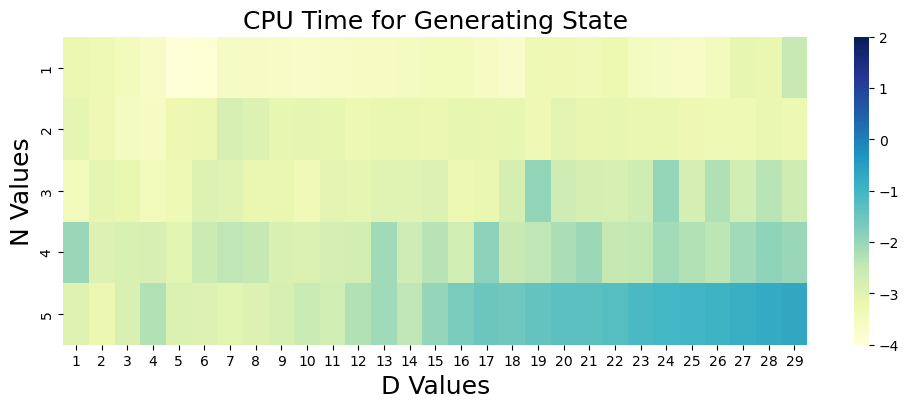

In [10]:
# Plot the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(np.log10(cpu_times_matrix_separable), annot=False, vmin=-4, vmax=2, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes)
plt.title("CPU Time for Generating State", fontsize=18)
plt.xlabel("D Values", fontsize=18)
plt.ylabel("N Values", fontsize=18)
plt.show()

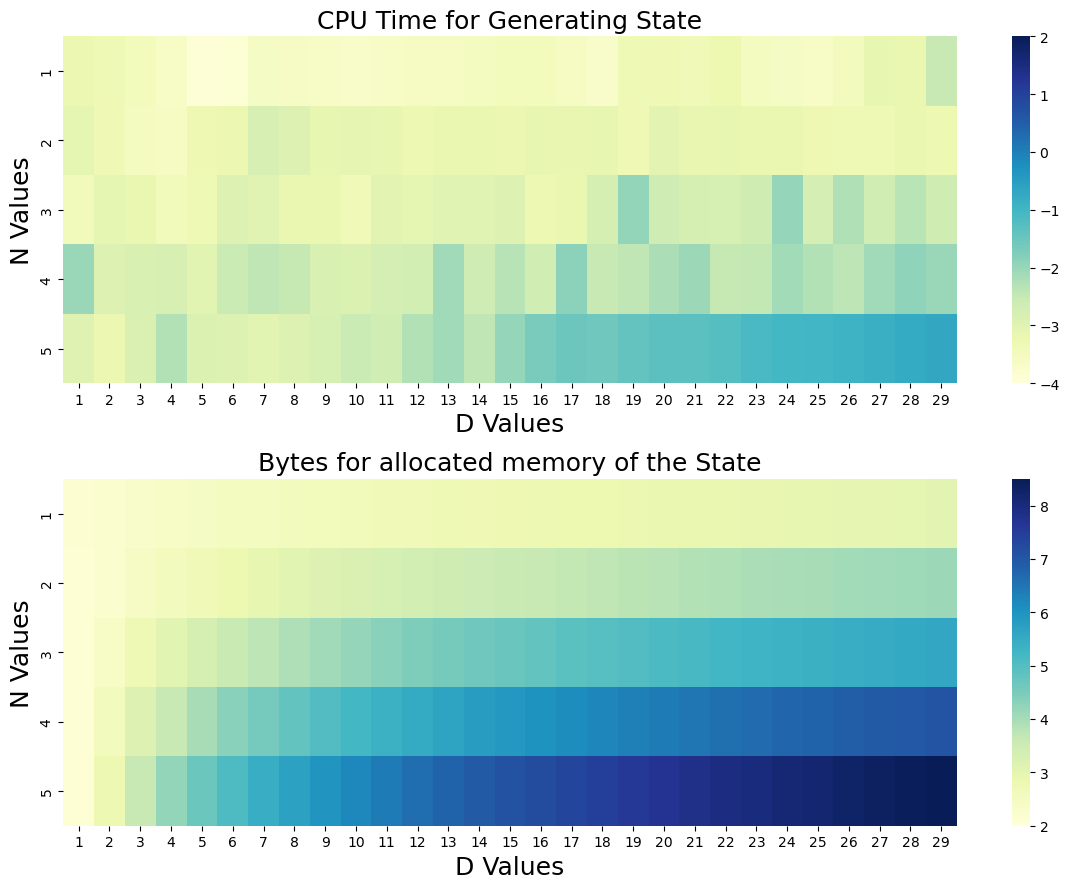

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

sns.heatmap(np.log10(cpu_times_matrix_separable), annot=False, vmin=-4, vmax=2, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes, ax=axes[0])
axes[0].set_title("CPU Time for Generating State", fontsize=18)
axes[0].set_xlabel("D Values", fontsize=18)
axes[0].set_ylabel("N Values", fontsize=18)

# Heatmap per il prodotto scalare degli autovettori
sns.heatmap(np.log10(bytes_matrix_separable), annot=False, vmin=2, vmax=8.5,  cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes, ax=axes[1])
axes[1].set_title("Bytes for allocated memory of the State", fontsize=18)
axes[1].set_xlabel("D Values", fontsize=18)
axes[1].set_ylabel("N Values", fontsize=18)

plt.tight_layout()
plt.show()

#### General

In [12]:
# parameters

N_max = 5
D_max = 20  # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345

type = "general"

N_sizes, D_sizes, cpu_times_matrix_general, bytes_matrix_general = fu.comput_time(N_max, D_max, seed, type)

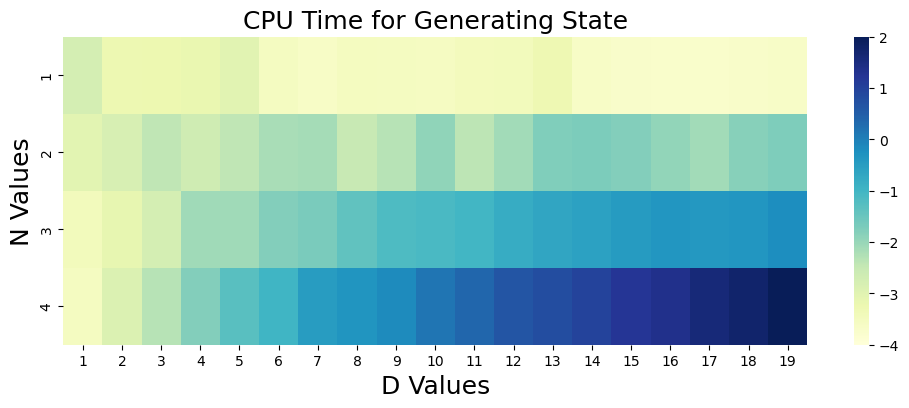

In [13]:
# Plot the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(np.log10(cpu_times_matrix_general), annot=False, vmin=-4, vmax=2, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes)
plt.title("CPU Time for Generating State", fontsize=18)
plt.xlabel("D Values", fontsize=18)
plt.ylabel("N Values", fontsize=18)
plt.show()

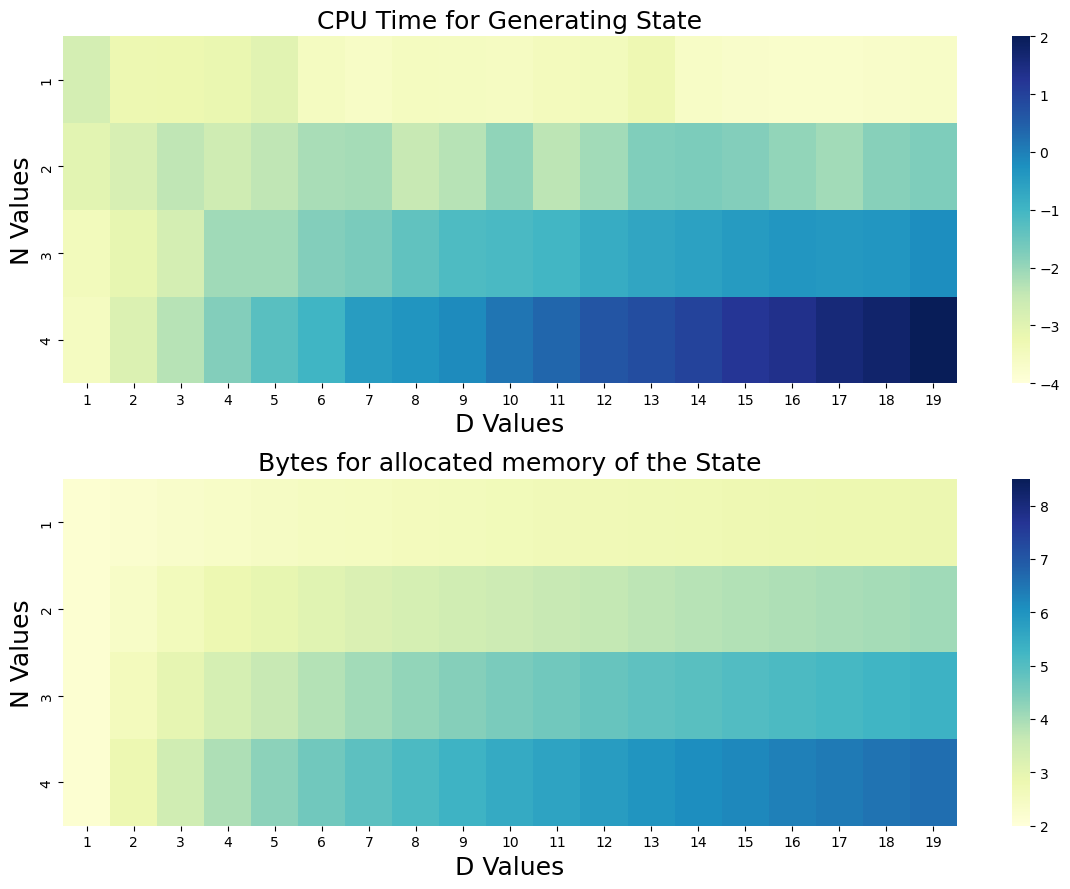

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

sns.heatmap(np.log10(cpu_times_matrix_general), annot=False, vmin=-4, vmax=2, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes, ax=axes[0])
axes[0].set_title("CPU Time for Generating State", fontsize=18)
axes[0].set_xlabel("D Values", fontsize=18)
axes[0].set_ylabel("N Values", fontsize=18)

# Heatmap per il prodotto scalare degli autovettori
sns.heatmap(np.log10(bytes_matrix_general), annot=False, vmin=2, vmax=8.5, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes, ax=axes[1])
axes[1].set_title("Bytes for allocated memory of the State", fontsize=18)
axes[1].set_xlabel("D Values", fontsize=18)
axes[1].set_ylabel("N Values", fontsize=18)

plt.tight_layout()
plt.show()

### Density Matrices

In [15]:
# parameters

N = 2   # 2 subsystems
D = 3   # QUTRITS
        # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345
type = "general"

In [16]:
coefficients = fu.initialize_coefficients(N, D, seed, type, random_init=True)  # Use random initialization

psi = fu.create_state(N, D, coefficients, type)

In [17]:
rho = rh.rho(psi)

In [18]:
keep_indices = [0]  # Keep the first site
rdm_left = rh.get_reduced_density_matrix(psi, D, N, keep_indices, print_rho=True)

# Compute the reduced density matrix for the second site (trace out the first site)
keep_indices = [1]  # Keep the second site
rdm_right = rh.get_reduced_density_matrix(psi, D, N, keep_indices, print_rho=True)


Reordered psi_tensor shape: (3, 3)
----------------------------------------------------
DENSITY MATRIX TRACING SITES ([1])
----------------------------------------------------
[[0.38815242-2.21961016e-18j 0.11364217+1.38031883e-01j
  0.41557998+1.08349931e-01j]
 [0.11364217-1.38031883e-01j 0.10936191-2.50453790e-18j
  0.18235047-1.08384021e-01j]
 [0.41557998-1.08349931e-01j 0.18235047+1.08384021e-01j
  0.50248566-1.96564099e-18j]]
Reordered psi_tensor shape: (3, 3)
----------------------------------------------------
DENSITY MATRIX TRACING SITES ([0])
----------------------------------------------------
[[0.35958884-7.77577452e-18j 0.27510641-1.14459253e-01j
  0.29606387-1.57370447e-01j]
 [0.27510641+1.14459253e-01j 0.27695644-7.70721790e-19j
  0.31260139-3.14979227e-02j]
 [0.29606387+1.57370447e-01j 0.31260139+3.14979227e-02j
  0.36345473-1.96564099e-18j]]


## Test

In [19]:
test.test_separable_state_simple()
test.test_separable_state_combination()
test.test_general_state_bell()
test.test_general_state_single_nonzero()
test.test_separable_state_equal_superposition()

### TEST: Separable State Simple ###
Test passed.
Test passed.
Reordered psi_tensor shape: (2, 2)
Reordered psi_tensor shape: (2, 2)
Test passed.
Test passed.
### TEST: Separable State Combination ###
Test passed.
Test passed.
Reordered psi_tensor shape: (2, 2)
Reordered psi_tensor shape: (2, 2)
Test passed.
Test passed.
### TEST: General State Bell ###
Test passed.
Test passed.
Reordered psi_tensor shape: (2, 2)
Reordered psi_tensor shape: (2, 2)
Test passed.
Test passed.
### TEST: General State Single Non-Zero Component ###
Test passed.
Test passed.
Reordered psi_tensor shape: (2, 2)
Reordered psi_tensor shape: (2, 2)
Test passed.
Test passed.
### TEST: Separable State Equal Superposition ###
Test passed.
Test passed.
Reordered psi_tensor shape: (2, 2)
Reordered psi_tensor shape: (2, 2)
Test passed.
Test passed.
